In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 영상 기본 연산

## 영상 기본 정보

### 영상 기본 속성

In [2]:
import cv2

img = cv2.imread("images/lena.jpg")

In [3]:
print(img.shape)

(512, 512, 3)


In [4]:
print(img[0,0])

[127 136 226]


In [5]:
print(img.size)

786432


In [6]:
print(img.dtype)

uint8


### 영상 화소 처리하기

In [7]:
import cv2

In [8]:
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

In [9]:
height, width = img.shape

In [10]:
for y in range(height) :
    for x in range(width) :
        if(y%2==0) :
            img[y,x] = 0

In [11]:
for y in range(height) :
    if(y%2==0) :
        for x in range(width) :
            img[y,x] = 0

In [12]:
for y in range(height) :
    if(y%2==0) :
        img[y,:] = 0

In [13]:
cv2.imshow("Lena", img)
cv2.waitKey()
cv2.destroyAllWindows()

### 함수 만들어 사용하기

In [14]:
import numpy as np


def black_lines(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    for y in range(height):
        if(y % 2 == 0):
            img_[y, :] = 0
        else:
            img_[y, :] = img[y, :]
    return img_

In [15]:
def img_pro(func, img, *args, show=True, **kwargs):
    img_ = func(img, *args, **kwargs)
    if show:
        cv2.imshow("Image", img_)
        cv2.waitKey()
        cv2.destroyAllWindows()
    else:
        return img_

In [16]:
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
img_pro(black_lines, img)

In [17]:
t = img_pro(black_lines, img, show=False)

In [18]:
cv2.imshow("Lena", t)
cv2.waitKey()
cv2.destroyAllWindows()

#### Matplotlib을 이용한 출력함수

In [19]:
import cv2
import matplotlib.pyplot as plt

def img_pro2(func, img, *args, show=True, win=False, **kwargs):
    img_ = func(img, *args, **kwargs)
    if show:
        if win:
            cv2.imshow("Image", img_)
            cv2.waitKey()
            cv2.destroyAllWindows()
        else:
            fig, axes = plt.subplots(1,2)
            axes[0].imshow(img, cmap="gray")
            axes[0].axis("off"); axes[0].set_title("origin")
            axes[1].imshow(img_, cmap="gray", 
                           interpolation=None)
            axes[1].axis("off"); axes[1].set_title("target")
    else:
        return img_

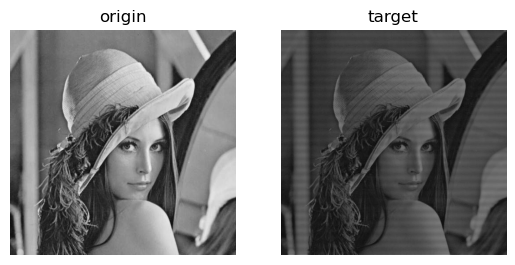

In [20]:
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
img_pro2(black_lines, img)

In [21]:
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
T = img_pro(black_lines, img, show=False)
cv2.imshow("Lena", T)
cv2.waitKey()
cv2.destroyAllWindows()

### ROI

In [22]:
img = cv2.imread('images/lena.jpg')

temp = img[200:380, 200:360]

cv2.imshow('img', img)
cv2.imshow('roi_img', temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 기본 연산

### 이미지 채널

In [23]:
import cv2
import numpy as np

img = cv2.imread('images/lena.jpg')
b, g, r= cv2.split(img)
print(np.mean(b), np.mean(g), np.mean(r), sep=", ")

105.54556274414062, 98.9676513671875, 180.31714248657227


In [24]:
img = cv2.imread('images/lena.jpg')
img[:,:,[0,1]] = 0

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 합치기

#### cv2.add() vs. np.add()

In [25]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

img1 = cv2.imread('images/flower1.jpg')
img2 = cv2.imread('images/flower2.jpg')

cv2.imshow('Flower 1', img1)
cv2.imshow('Flower 2', img2)
cv2.imshow('cv2.add', cv2.add(img1, img2))
cv2.imshow('np.add', np.add(img1, img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 이미지 블랜딩

In [26]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

img1 = cv2.imread('images/flower1.jpg')
img2 = cv2.imread('images/flower2.jpg')

def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('W', 'image', 0, 100, nothing)

while True:
    w = cv2.getTrackbarPos('W','image')
    dst = cv2.addWeighted(img1,float(100-w) * 0.01, img2,float(w) * 0.01,0)
    cv2.imshow('dst', dst)
    if cv2.waitKey(1) &0xFF == 27:
        break;

cv2.destroyAllWindows()

In [27]:
import cv2
import numpy as np

def weighted_blending(img1, img2, img1_weight=0.5):
    output = np.zeros(img1.shape, dtype=np.uint8)
    height, width = img1.shape[0:2]
    if len(img1.shape)==2:
        for y in range(height):
            for x in range(width):
                output[y,x] = int(img1[y,x]*img1_weight + \
                                  img2[y,x]*(1-img1_weight))
    elif len(img1.shape)==3:
        for y in range(height):
            for x in range(width):
                blended = img1[y,x]*img1_weight + \
                          img2[y,x]*(1-img1_weight)
                output[y,x] = blended.astype(np.uint8)
    return output

In [28]:
img1 = cv2.imread("images/flower1.jpg")
img2 = cv2.imread("images/flower2.jpg")

In [29]:
new_img = weighted_blending(img1, img2, img1_weight=0.7)

In [30]:
cv2.imshow('Image 1', img1)
cv2.imshow('Image 2', img2)
cv2.imshow('Blended', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
import cv2
import numpy as np

def ez_blending(img1, img2, img1_weight=0.5):
    output = img1*img1_weight + img2*(1-img1_weight)
    return output.astype(np.uint8)

In [32]:
new_img = ez_blending(img1, img2, img1_weight=0.3)
cv2.imshow('img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 비트연산

In [33]:
A = np.array([1,2,3,4,5,6], dtype=np.uint8)

In [34]:
A > 2

array([False, False,  True,  True,  True,  True])

In [35]:
(A > 3) * 255

array([  0,   0,   0, 255, 255, 255])

In [36]:
import cv2
import numpy as np

logo = cv2.imread('images/logo.png')
lena = cv2.imread('images/lena.jpg')

# 삽입할 이미지의 row, col, channel정보
rows, cols, channels = logo.shape

# 대상 이미지에서 삽입할 이미지의 영역을 추출
roi = lena[0+50:rows+50, 0+50:cols+50]

#mask를 만들기 위해서 img1을 gray로 변경후 binary image로 전환
#mask는 logo부분이 흰색(255), 바탕은 검은색(0)
#mask_inv는 logo부분이 검은색(0), 바탕은 흰색(255)
logogray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(logogray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

In [37]:
cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('roi', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
#bitwise_and 연산자는 둘다 0이 아닌 경우만 값을 통과 시킴.
#즉 mask가 검정색이 아닌 경우만 통과가 되기때문에 mask영역 이외는 모두 제거됨.
#아래 img1_fg의 경우는 bg가 제거 되고 fg(logo부분)만 남게 됨.
#img2_bg는 roi영역에서 logo부분이 제거되고 bg만 남게 됨.
logo_fg = cv2.bitwise_and(logo, logo, mask=mask)
lena_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#2개의 이미지를 합치면 바탕은 제거되고 logo부분만 합쳐짐.
dst = cv2.add(logo_fg, lena_bg)

#합쳐진 이미지를 원본 이미지에 추가.
lena[0+50:rows+50, 0+50:cols+50] = dst

cv2.imshow('result', lena)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### cv2.seamlessClone()

In [39]:
import cv2
import numpy as np

logo = cv2.imread('images/logo.png')
lena = cv2.imread('images/lena.jpg')

mask = np.full_like(logo, 255)
height, width = lena.shape[:2]
center = (width//2, height//2)

normal = cv2.seamlessClone(logo, lena, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(logo, lena, mask, center, cv2.MIXED_CLONE)

cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
import cv2
import numpy as np 

# Read images
src = cv2.imread("images/airplane2.jpg")
dst = cv2.imread("images/red_sky.jpg")

# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ (0,40), (150,60), (203,56), (200,100), (88,103), (1,75) ], np.int32)
# poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (600,150)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

# Save result
cv2.imshow('Output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
import cv2
import numpy as np 

src = cv2.imread("images/airplane1.jpg")
dst = cv2.imread("images/sunset2.jpg")

src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,190], [160,220], [640,150], [630,180], [690,240], [340,310], [15,300] ], np.int32)
#poly = np.array([ [0,40], [150,60], [203,56], [200,100], [88,103], [1,75] ], np.int32)
# poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

center = (600,300)

output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

cv2.imshow('Output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
import cv2

src = cv2.imread("images/airplane2.jpg")
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [0,40], [150,60], [203,56], [200,100], [88,103], [1,75] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))
center = (200,150)

cap = cv2.VideoCapture(1)

if cap.isOpened():
    print(cap.get(cv2.CAP_PROP_FPS))
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            output = cv2.seamlessClone(src, img, src_mask, center, cv2.NORMAL_CLONE)
            cv2.imshow("Movie", output)
            if cv2.waitKey(delay) & 0xFF == 27 : # ESC키
                print("ESC Key pressed")
                break
        else:
            print("No Frame")
            print(ret, img)
            break
        
else:
    print("File not opened")

cap.release()
cv2.destroyAllWindows()

File not opened


## 이진화

### 이진화

In [43]:
import numpy as np

def two_tone(img, threshold=128):
    output = (img > threshold) * 255
    return output.astype(np.uint8)

In [44]:
import cv2
img = cv2.imread("images/lena.jpg", 0)
new_img = two_tone(img, threshold=100)
cv2.imwrite('lena_bin.jpg', new_img)
cv2.imshow('img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cv2.threshold()

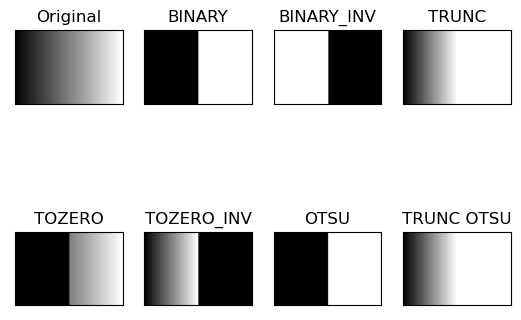

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/gradation.png',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)
ret, thresh6 = cv2.threshold(img,-1,255, cv2.THRESH_OTSU)
ret, thresh7 = cv2.threshold(img,-1,255, cv2.THRESH_TRUNC | cv2.THRESH_OTSU)

titles = ['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','OTSU','TRUNC OTSU']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7]

for i in range(8):
    plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

### 적응 임계처리

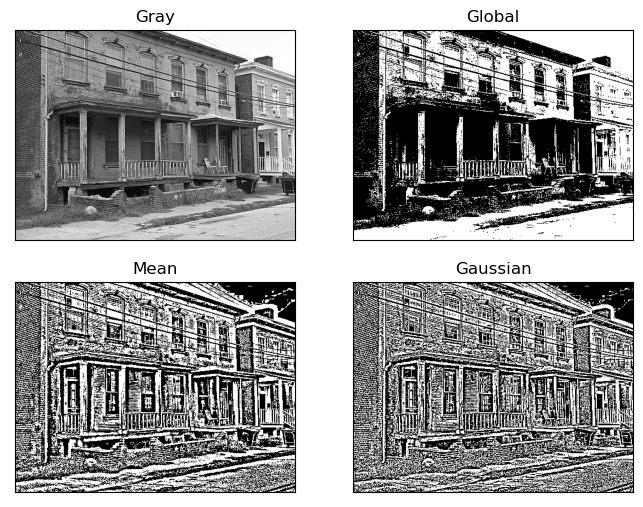

In [46]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img_gray = cv2.imread('images/house.jpg', 0)

_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
adt_mean = cv2.adaptiveThreshold(img_gray, 255, 
                                 cv2.ADAPTIVE_THRESH_MEAN_C, 
                                 cv2.THRESH_BINARY, 15, 0)
adt_gaus = cv2.adaptiveThreshold(img_gray, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY, 15, 0)

titles = ['Gray', 'Global', 'Mean', 'Gaussian']
images = [img_gray, img_bin, adt_mean, adt_gaus]

plt.figure(figsize=(8,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

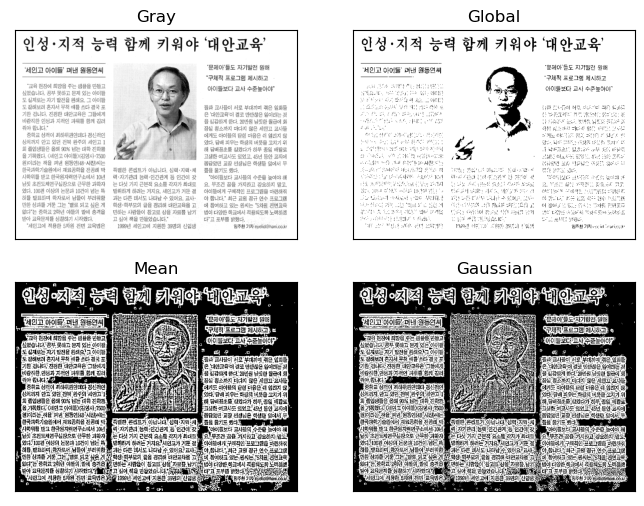

In [47]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img_gray = cv2.imread('images/paper.jpg', 0)

_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
adt_mean = cv2.adaptiveThreshold(img_gray, 255, 
                                 cv2.ADAPTIVE_THRESH_MEAN_C, 
                                 cv2.THRESH_BINARY, 7, 0)
adt_gaus = cv2.adaptiveThreshold(img_gray, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY, 7, 0)

titles = ['Gray', 'Global', 'Mean', 'Gaussian']
images = [img_gray, img_bin, adt_mean, adt_gaus]

plt.figure(figsize=(8,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

### 디더링

In [48]:
def minmax(pixel):
    if pixel > 255:
        pixel = 255
    if pixel < 0:
        pixel = 0
    return pixel

In [49]:
import numpy as np

def dithering(img):
    height, width = img.shape

    for y in range(0, height-1):
        for x in range(1, width-1):
            p = img[y, x]
            new_p = np.round(p/255) * 255
            img[y, x] = new_p
            error = p - new_p

            img[y  , x+1] = minmax(img[y  , x+1] + error*7/16)
            img[y+1, x-1] = minmax(img[y+1, x-1] + error*3/16)
            img[y+1, x  ] = minmax(img[y+1, x  ] + error*5/16)
            img[y+1, x+1] = minmax(img[y+1, x+1] + error*1/16)

    return img

In [50]:
import cv2

lena = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
lena_dithering = dithering(lena.copy())
# cv2.imwrite('lena_dithering.jpg', lena_gray_dithering)
cv2.imshow('Lena grayscale', lena)
cv2.imshow('Lena dithering', lena_dithering)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
import numpy as np

def minmax(pixel):
    if pixel > 255:
        pixel = 255
    if pixel < 0:
        pixel = 0
    return pixel

def dithering_gray(img, sampling=1):
    height, width = img.shape

    for y in range(0, height-1):
        for x in range(1, width-1):
            p = img[y, x]
            new_p = np.round(p/255) * 255/sampling
            img[y, x] = new_p
            error = p - new_p

            img[y  , x+1] = minmax(img[y  , x+1] + error*7/16.0)
            img[y+1, x-1] = minmax(img[y+1, x-1] + error*3/16.0)
            img[y+1, x  ] = minmax(img[y+1, x  ] + error*5/16.0)
            img[y+1, x+1] = minmax(img[y+1, x+1] + error*1/16.0)

    return img

In [52]:
import cv2
lena = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
lena_gray_dithering = dithering_gray(lena.copy(), 1.5)
cv2.imshow('Lena grayscale', lena)
cv2.imshow('Lena dithering', lena_gray_dithering)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
import numpy as np

def minmax(pixel):
    if pixel > 255:
        pixel = 255
    if pixel < 0:
        pixel = 0
    return pixel

def dithering_color(inMat, samplingF):
    h = inMat.shape[0]
    w = inMat.shape[1]

    # loop over the image
    for y in range(0, h-1):
        for x in range(1, w-1):
            old_b = inMat[y, x, 0]
            old_g = inMat[y, x, 1]
            old_r = inMat[y, x, 2]

            new_b = np.round(samplingF * old_b/255.0) * (255/samplingF)
            new_g = np.round(samplingF * old_g/255.0) * (255/samplingF)
            new_r = np.round(samplingF * old_r/255.0) * (255/samplingF)

            inMat[y, x, 0] = new_b
            inMat[y, x, 1] = new_g
            inMat[y, x, 2] = new_r

            quant_error_b = old_b - new_b
            quant_error_g = old_g - new_g
            quant_error_r = old_r - new_r

            inMat[y, x+1, 0] = minmax(inMat[y, x+1, 0] +
                                      quant_error_b * 7 / 16.0)
            inMat[y, x+1, 1] = minmax(inMat[y, x+1, 1] +
                                      quant_error_g * 7 / 16.0)
            inMat[y, x+1, 2] = minmax(inMat[y, x+1, 2] +
                                      quant_error_r * 7 / 16.0)

            inMat[y+1, x-1, 0] = minmax(inMat[y+1,
                                              x-1, 0] + quant_error_b * 3 / 16.0)
            inMat[y+1, x-1, 1] = minmax(inMat[y+1,
                                              x-1, 1] + quant_error_g * 3 / 16.0)
            inMat[y+1, x-1, 2] = minmax(inMat[y+1,
                                              x-1, 2] + quant_error_r * 3 / 16.0)

            inMat[y+1, x, 0] = minmax(inMat[y+1, x, 0] +
                                      quant_error_b * 5 / 16.0)
            inMat[y+1, x, 1] = minmax(inMat[y+1, x, 1] +
                                      quant_error_g * 5 / 16.0)
            inMat[y+1, x, 2] = minmax(inMat[y+1, x, 2] +
                                      quant_error_r * 5 / 16.0)

            inMat[y+1, x+1, 0] = minmax(inMat[y+1,
                                              x+1, 0] + quant_error_b * 1 / 16.0)
            inMat[y+1, x+1, 1] = minmax(inMat[y+1,
                                              x+1, 1] + quant_error_g * 1 / 16.0)
            inMat[y+1, x+1, 2] = minmax(inMat[y+1,
                                              x+1, 2] + quant_error_r * 1 / 16.0)

    return inMat

In [54]:
lena = cv2.imread('images/lena.jpg')
lena_dithering = dithering_color(lena.copy(), 1)
cv2.imwrite('lena_dithering.jpg', lena_dithering)
cv2.imshow('Lena grayscale', lena)
cv2.imshow('Lena dithering', lena_dithering)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 히스토그램

### 이미지 히스토그램

In [55]:
import cv2
img = cv2.imread("images/couple2.jpg", flags=cv2.IMREAD_GRAYSCALE)

In [56]:
import numpy as np
hist = np.zeros((256))

In [57]:
height, width = img.shape

In [58]:
for y in range(height):
    for x in range(width):
        hist[img[y,x]] = hist[img[y,x]] + 1

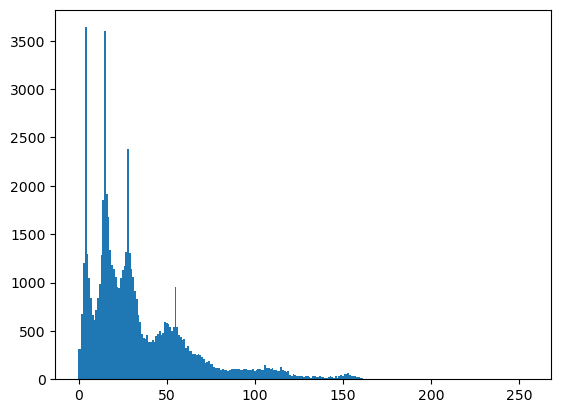

In [59]:
import matplotlib.pyplot as plt
plt.bar(x=range(256), height=hist, width=1)
plt.show()

### 히스토그램 함수 구현

In [60]:
max(hist)

3639.0

In [61]:
hist_img = np.full((300+30,256), 255, dtype=np.uint8)

In [62]:
hist = hist.astype(int)

In [63]:
hist_max = max(hist)

In [64]:
for i, value in enumerate(hist):
    height = -int(value * 300/hist_max)
    if height<-1:
        hist_img[height:,i] = 0

In [65]:
cv2.imshow('Histogram', hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
import numpy as np

def histogram(img):
    height, width = img.shape
    hist_ = np.zeros(256)

    for y in range(height):
        for x in range(width):
            hist_[img[y,x]] = hist_[img[y,x]] + 1
            
    return hist_

In [67]:
import cv2
img = cv2.imread("images/couple256.jpg", 0)
hist = histogram(img)

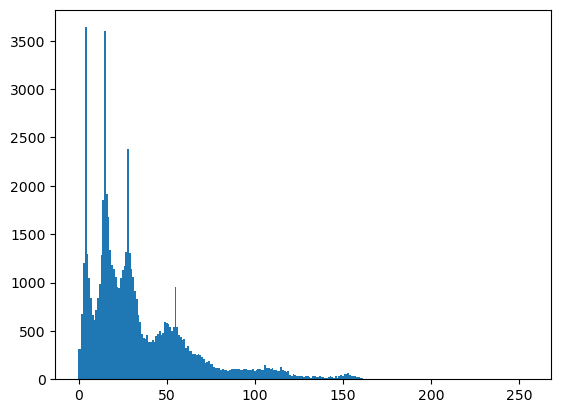

In [68]:
import matplotlib.pyplot as plt
plt.bar(range(256), height=hist, width=1)
plt.show()

In [69]:
import numpy as np

def histogram_img(hist):
    hist_height = 150
    hist_img = np.full((hist_height, 256), 255, dtype=np.uint8)
    hist = hist.astype(int)
    hist_max = max(hist)
    for i, value in enumerate(hist):
        height = -int(value * (hist_height/hist_max))
        if height<-1:
            hist_img[height:,i] = 0

    return hist_img

In [70]:
import cv2
img = cv2.imread("images/couple256.jpg", 0)
hist = histogram(img)
hist_img = histogram_img(hist)
cv2.imshow('Histogram', hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cv2.calcHist()

In [78]:
import cv2
import numpy as np

img = cv2.imread("./images/flower1.jpg", cv2.IMREAD_GRAYSCALE)

hist_img = np.full((100,256), 255, dtype=np.uint8)
height, width = hist_img.shape

hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0,255])
m = np.max(hist)
hist = (hist/m*100)[:,0].astype(int)
# print(hist)
for x, h in enumerate(hist):
    cv2.line(hist_img, (x,height-h), (x,height), (0,0,0), 1)
       
cv2.imshow("histogram", hist_img)
cv2.waitKey()
cv2.destroyAllWindows()

### 채널

In [76]:
import cv2
import numpy as np

img = cv2.imread("./images/flower1.jpg")
height, width, channels = img.shape
colors = [(255,0,0), (0,255,0), (0,0,255)]

for channel in range(channels):
    hist = cv2.calcHist(images=[img], channels=[channel], 
                        mask=None, histSize=[255], ranges=[1,255])
    m = np.max(hist)
    hist = (hist/m*100)[:,0].astype(int)
    for x, h in enumerate(hist):
        y = height-channel*100
        cv2.line(img, (x,y-h), (x,y), colors[channel], 1)
        
cv2.imshow("image", img) # 이미지를 출력함
cv2.waitKey()
cv2.destroyAllWindows()